In [17]:
# Import our dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
# Import the kerastuner library
import keras_tuner as kt


In [18]:
#  Import and read the datasets.csv
import pandas as pd 
crime_df = pd.read_csv("../cleaned_data_2015_2018/all_data_merged_cleaned_2015_2018.csv")
crime_df.head()

,EVENT_UNIQUE_ID,CRIME,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,PREMISES_TYPE,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,IS_CRIME,date
0,GO-20155154,assault,2015,January,1,Thursday,23,House,115,Mount Dennis (115),-79.504668,43.693238,1,2015-01-01
1,GO-20151233,assault,2015,January,1,Thursday,3,Commercial,77,Waterfront Communities-The Island (77),-79.392855,43.647315,1,2015-01-01
2,GO-2015862,assault,2015,January,1,Thursday,2,Commercial,77,Waterfront Communities-The Island (77),-79.387700,43.649776,1,2015-01-01
3,GO-2015182,assault,2015,January,1,Thursday,0,Commercial,1,West Humber-Clairville (1),-79.595562,43.686751,1,2015-01-01
4,GO-2015276,assault,2015,January,1,Thursday,0,Outside,77,Waterfront Communities-The Island (77),-79.400096,43.645835,1,2015-01-01


In [19]:
#  Import and read the datasets.csv
import pandas as pd 
weather_df = pd.read_csv("../cleaned_data_2015_2018/toronto_daily_weather_2015_2018.csv")
weather_df.head()

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,snow_on_ground,daylight,avg_cloud_cover_8
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,0,8.98,4.5
1,2018-12-30,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,2,8.97,5.0
2,2018-12-29,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,0,8.95,4.5
3,2018-12-28,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,0,8.93,4.5
4,2018-12-27,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,0,8.93,4.0


In [20]:
# Drop the non-beneficial ID columns, from crime data
# For optimization remove only 'EIN' and 'STATUS', keep 'NAME'
crime_df.drop(columns=['EVENT_UNIQUE_ID','OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOW', 'OCC_HOUR', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84' ], inplace=True)
crime_df.head()

,CRIME,PREMISES_TYPE,HOOD_140,IS_CRIME,date
0,assault,House,115,1,2015-01-01
1,assault,Commercial,77,1,2015-01-01
2,assault,Commercial,77,1,2015-01-01
3,assault,Commercial,1,1,2015-01-01
4,assault,Outside,77,1,2015-01-01


In [21]:
# Drop the non-beneficial ID columns, from weather
# For optimization remove only 'EIN' and 'STATUS', keep 'NAME'
weather_df.drop(columns=['max_relative_humidity', 'rain', 'snow'], inplace=True)
weather_df.head()

,date,max_temperature,min_temperature,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,snow_on_ground,daylight,avg_cloud_cover_8
0,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5
1,2018-12-30,0.7,-6.6,78.0,102.03,24,1.2,2,8.97,5.0
2,2018-12-29,2.7,-7.0,68.0,101.86,34,0.0,0,8.95,4.5
3,2018-12-28,12.4,2.7,84.5,100.89,30,1.8,0,8.93,4.5
4,2018-12-27,2.8,-7.4,74.0,102.52,30,5.4,0,8.93,4.0


In [22]:
# Merge weather and crime dataframes
alldata_df = pd.merge(weather_df, crime_df, on="date", how="left")

alldata_df.head()

,date,max_temperature,min_temperature,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,CRIME,PREMISES_TYPE,HOOD_140,IS_CRIME
0,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,assault,Apartment,2,1
1,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,assault,House,127,1
2,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,assault,Outside,28,1
3,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,assault,House,112,1
4,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,assault,Outside,25,1


#### PreProcessing


In [23]:
# Determine the number of unique values in each column.
unique =alldata_df.nunique()
unique

date                     1461
max_temperature           434
min_temperature           409
avg_relative_humidity     120
avg_pressure_sea          323
max_wind_speed             52
precipitation             112
snow_on_ground             22
daylight                  383
avg_cloud_cover_8          16
CRIME                      10
PREMISES_TYPE               7
HOOD_140                  141
IS_CRIME                    1
dtype: int64

In [24]:
# Look at APPLICATION_TYPE value counts for binning
hood_counts =alldata_df.HOOD_140.value_counts()
hood_counts

NSA    38072
77     16624
1      10832
76     10829
75      9044
       ...  
140      793
12       780
69       761
60       579
114      383
Name: HOOD_140, Length: 141, dtype: int64

<AxesSubplot:ylabel='Density'>

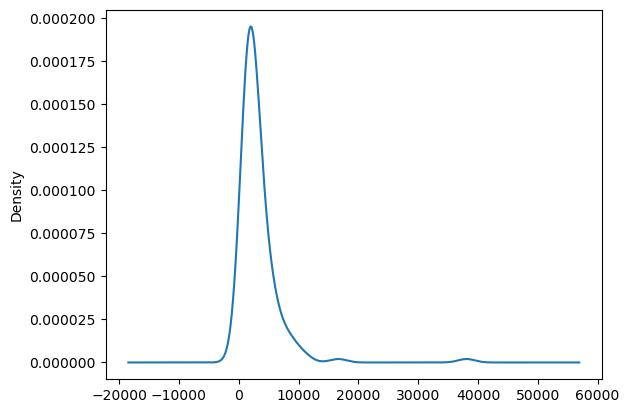

In [25]:
# Visualize the value counts of APPLICATION_TYPE
hood_counts.plot.density()

In [26]:
# Determine which values to replace if counts are less than ...?
replace_hood = list(hood_counts[hood_counts < 1000].index)

# Replace in dataframe
for app in replace_hood:
    alldata_df.HOOD_140 = alldata_df.HOOD_140.replace(app,"Other")
    
# Check to make sure binning was successful
alldata_df.HOOD_140.value_counts()

NSA    38072
77     16624
1      10832
76     10829
75      9044
       ...  
19      1152
106     1132
8       1129
9       1066
10      1027
Name: HOOD_140, Length: 132, dtype: int64

In [27]:
# Generate our categorical variable lists
data_cat = alldata_df.dtypes[alldata_df.dtypes == "object"].index.tolist()

data_cat

data_cat = ['CRIME', 'PREMISES_TYPE', 'HOOD_140']

data_cat

['CRIME', 'PREMISES_TYPE', 'HOOD_140']

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(alldata_df[data_cat])) 

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(data_cat)
encode_df.head()

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CRIME_assault,CRIME_auto_theft,CRIME_bicycle_theft,CRIME_break_and_enter,CRIME_homicide,CRIME_robbery,CRIME_shooting,CRIME_theft_from_motor_vehicle,CRIME_theft_over,CRIME_traffic_collision,...,HOOD_140_92,HOOD_140_93,HOOD_140_94,HOOD_140_95,HOOD_140_96,HOOD_140_97,HOOD_140_98,HOOD_140_99,HOOD_140_NSA,HOOD_140_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Merge one-hot encoded features and drop the originals
alldata_df = alldata_df.merge(encode_df,left_index=True, right_index=True)
alldata_df = alldata_df.drop(data_cat,1)
alldata_df.head()

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,date,max_temperature,min_temperature,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,...,HOOD_140_92,HOOD_140_93,HOOD_140_94,HOOD_140_95,HOOD_140_96,HOOD_140_97,HOOD_140_98,HOOD_140_99,HOOD_140_NSA,HOOD_140_Other
0,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Split our preprocessed data into our features and target arrays
#TODO - need column for target
y = alldata_df["IS_CRIME"].values
X = alldata_df.drop(["IS_CRIME"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: '2018-09-09'

In [ ]:
# Verify X_Train
X_train_scaled

#### Build single model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 1800
hidden_nodes_layer2 = 1200

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
#nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

In [ ]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# # Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Save Model  ###   Final name should be:   AlphabetSoupCharity.h5
nn_model.save("Crime_singleLayer.h5")